# Multiple regression

## Definitions

**Multiple regression** extends simple linear regression to allow for multiple independent (X) variables:

- to assess the impact of one variable after accounting for others
- to create an equation for making useful predictions
- to understand scientifically how much changes in each of several variables contribute to explaining an outcome of interest

Different regression methods are available for different kinds of data. In multiple linear regression, theeee outcome variable is continuous. In contrast, the outcome is binary in logistic regression, and survival time in proportional hazards regression.

A regression model predicts one variable Y from one or more other variables X.  
The Y variable is called *dependent variable*, *the response variable*, or *the outcome variable*.  
The X variables are called *independent variables*, *explanatory variables*, or *predictor variables*.  
Each independent variable can be:

- continuous (e.g. age, blood pressure, weight)
- binary/dummy variable (e.g. code for gender)
- categorical with 3 or more categories (e.g. school classes, countries)

The multiple regression model defines the dependent variables as a function of the independent variables and a set of parameters or **regression coefficients**. Regression methods find the values of each parameter that make the model predictions come as close as possible to the data. This approach is analoguous to linear regression (least-squares method).

The goal is to answer a question, e.g.
>after adjusting for effects of the other variables, is there a substantial linear relationship between one independent variable and the depedent variable?

Multiple regression is also called *multivariable regression* refering to models with 2 or more X variables.
Methods exist that can simultaneously analyze several outcomes (Y variables) at once = *multivariate methods*, e.g. factor analysis, cluster analysis, PCA and MANOVA. *Univariate methods* deal witha single Y.

### Mathematical model

The model predicts the value of the dependent variable from a baseline value plus the effect of multiple independent variables, each multippppled by a regression coefficient, also called a regression parameter. Its equation can be writen as follow:

$$ Y_i = \beta_0 + \beta_1 X_{i,1} + \beta_2 X_{i,2} + \beta_3 X_{i,3} + \beta_4 X_{i,4} + \beta_5 X{i,5} + \epsilon_i $$

The subscript $i$ refers to the particular individual, and $\epsilon$ the random variability. For example, the equation models a multiple regression in the form of:

$$ Y_i = \beta_0 + \beta_1.\text{log(serum lead)} + \beta_2 . \text{Age} + \beta_3 . \text{BMI} + \beta_4 . \text{log(GGT)} + \beta_5 . \text{Diuretics?} + \epsilon_i $$

For example, with a best-fit value of $\beta_1 = -9.5$ units, on average and after accounting for differences in the other variables, an increase in $\text{log(serum lead)}$ of one unit (i.e. tenfold increase in serum lead), is associated with a decrease in $Y$ of 9.5 units.

Also the last variable 'Diurectics' is designated as the _dummy variable_ because those two particular values were chosen arbitrarily to designate two groups and coded as 0 or 1. With $\beta_5 = -8.8$, on average, after taking into account differences in the other variables, participants who had taken diuretics previously (coded as 1) had a $Y$ 8.8 lower than that of participants who had not taken diuretics (encoded as 0).

ANCOVA is a model equivalent to multiple linear regression when at least one independent variable is categorical and at least one is continuous (not explained here).

### Unidimensional, multiple covariables

This is typically the case where we would like to describe $Y = \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon$

## Practical example

We use the dataset from the MOOC 'Introducton à la statistique avec R' which deals with multiple regression.

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm

In [97]:
data = pd.read_csv(
    'https://raw.githubusercontent.com/sbwiecko/intro_statistique_R/master/data/smp2.tsv',
    delimiter='\t',
)
data.head()

,age,prof,duree,discip,n.enfant,n.fratrie,ecole,separation,juge.enfant,place,...,subst.cons,scz.cons,char,rs,ed,dr,suicide.s,suicide.hr,suicide.past,dur.interv
0,31.0,autre,4.0,0.0,2.0,4,1.0,0.0,0.0,0.0,...,0,0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,NaN
1,49.0,NaN,NaN,0.0,7.0,3,2.0,1.0,0.0,0.0,...,0,0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,70.0
2,50.0,prof.intermediaire,5.0,0.0,2.0,2,2.0,0.0,0.0,0.0,...,0,0,1.0,2.0,3.0,2.0,0.0,0.0,0.0,NaN
3,47.0,ouvrier,NaN,0.0,0.0,6,1.0,1.0,0.0,1.0,...,0,0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,105.0
4,23.0,sans emploi,4.0,1.0,1.0,6,1.0,1.0,NaN,1.0,...,0,0,1.0,2.0,2.0,2.0,0.0,0.0,1.0,NaN


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           797 non-null    float64
 1   prof          793 non-null    object 
 2   duree         576 non-null    float64
 3   discip        793 non-null    float64
 4   n.enfant      773 non-null    float64
 5   n.fratrie     799 non-null    int64  
 6   ecole         794 non-null    float64
 7   separation    788 non-null    float64
 8   juge.enfant   794 non-null    float64
 9   place         792 non-null    float64
 10  abus          792 non-null    float64
 11  grav.cons     795 non-null    float64
 12  dep.cons      799 non-null    int64  
 13  ago.cons      799 non-null    int64  
 14  ptsd.cons     799 non-null    int64  
 15  alc.cons      799 non-null    int64  
 16  subst.cons    799 non-null    int64  
 17  scz.cons      799 non-null    int64  
 18  char          703 non-null    

### Multiple linear regression with statsmodels.OLS

Let's compute of the parameters for independent variables *age*, *dep.cons*, *subst.cons* and *scz.cons* using the model $ Y_i = \beta_0 + \beta_\text{age} X_{i, \text{age}} + \beta_\text{dep.cons} X_{i, \text{dep.cons}} + \beta_\text{subst.cons} X_{i, \text{subst.cons}} + \beta_\text{scz.cons} X_{i, \text{scz.cons}} + \epsilon_i $ where subscript _i_ refering to the particular participant, and with the 3 last variables designated as **dummy variables** because those values were chosen arbitrarily to designate two groups (yes or no).

Each regression coefficient represents the average change in Y when we change the corresponding X value by 1.0. For example, $\beta_4$ is the average difference in Y between those who have _scz.cons_ and those who don't. The intercept $\beta_0$ is the predicted average value of Y when all the X values are zero, and might only have a mathematical meaning.

In [99]:
data_ = data.dropna(subset=['dur.interv', 'age', 'dep.cons', 'subst.cons', 'scz.cons']) # drop any NaN in the indicated subset
y = data_['dur.interv']
X = data_[['age', 'dep.cons', 'subst.cons', 'scz.cons']]

X = sm.add_constant(X) #adding one column of ones, i.e. adding the intercept
mod = sm.OLS(y, X)
est = mod.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:             dur.interv   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     11.49
Date:                Thu, 05 Aug 2021   Prob (F-statistic):           4.69e-09
Time:                        16:35:32   Log-Likelihood:                -3260.7
No. Observations:                 747   AIC:                             6531.
Df Residuals:                     742   BIC:                             6554.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.9011      2.622     18.649      0.0

C:\Users\Sébastien\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#### Rreading the regression table report

The first panel gives you an overview of the fit quality:

* You recognize the good old $R^2$ and $R_a^2$
* The F-statistic and its associated P-value test the hypothesis that all the coefficients are 0 (normality assumption)
* You should also recognize the log-likelihood (normality assumption)
* AIC and BIC respectively Aikike Information Criterion and Bayesian Information Criterion are equivalent of likelihood but that you can use to compare non nested models.

The second panel is quite self explanatory, just be careful with this t-test which again makes the assumption that errors are normally distributed, same for the standard error and the 95% confidence interval.

The third panel is a summary of a few statistical tests that will give you a sense of how all of the hypothesis needed for OLS are plausible:

* Omnibus and Prob(omnibus): this is a test for normality of residuals. Low P-values means that your linear model is not adapted
* Durbin-Watson : tests autocorrelation in the error terms (2 is no autocorrelation, less than 1 is bad)
* Jarque-Bera: tests if the skewness and kurtosis of your errors are looking like a normal distribution. If the Pvalue is high then they look normal.
* Condition Number : sensibility to noise of the fit.Skewness and kurtosis of your noise (both 0 for normally distributed noise)

#### Interpretation of the results

The investigator's goal was to answer the question, after adjusting for effects of the other variables, is there a substantial linear relationship between the *age* and *dur.interv*. The best-fit value of $\beta_1$ was 0.2210. This means that, **on average, and after accounting for differences in the other variables, an increase in *age* of one unit is associated with an increase of *dur.interv* of 0.2210**. The 95% CI ranges from 0.109 to 0.333.

For the dummy variables, for example *dep.cons*, $\beta_2$ was 7.3893. That variable is coded as zero if the participant had no *dep.cons* and 1 if he had. Therefore, on average, participant who had *dep.cons* had an *dur.interv* that was 7.389 units higher that of participants who had not. Below, the partial regression plot shows the relationship between the response and the given explanatory variable after removing the effect of all other explanatory variables in X, called _exog_. Many other regression plots can be produced as explained [elsewhere](https://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html.)

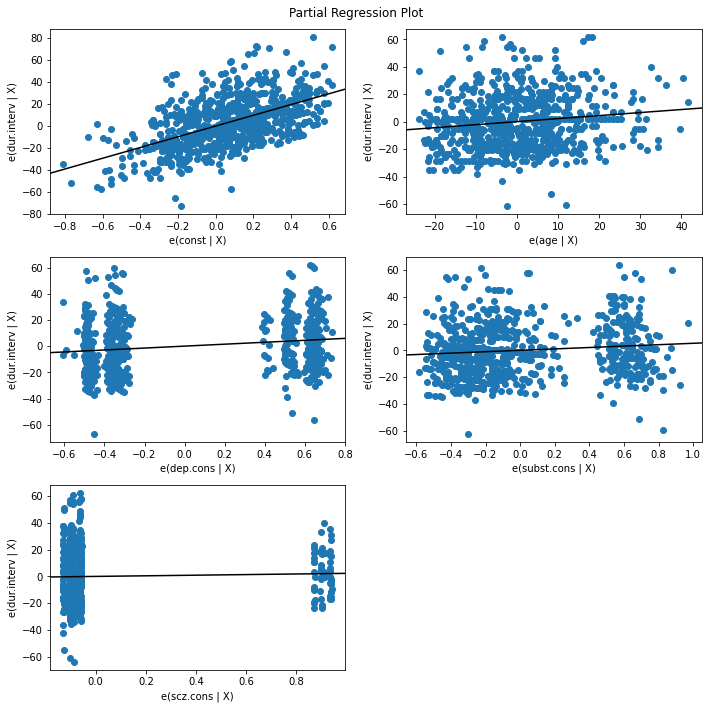

In [100]:
# pass in the model as the first parameter, then specify the 
# predictor variable we want to analyze
fig = plt.figure(figsize=(10,10))
fig = sm.graphics.plot_partregress_grid(est, fig=fig)

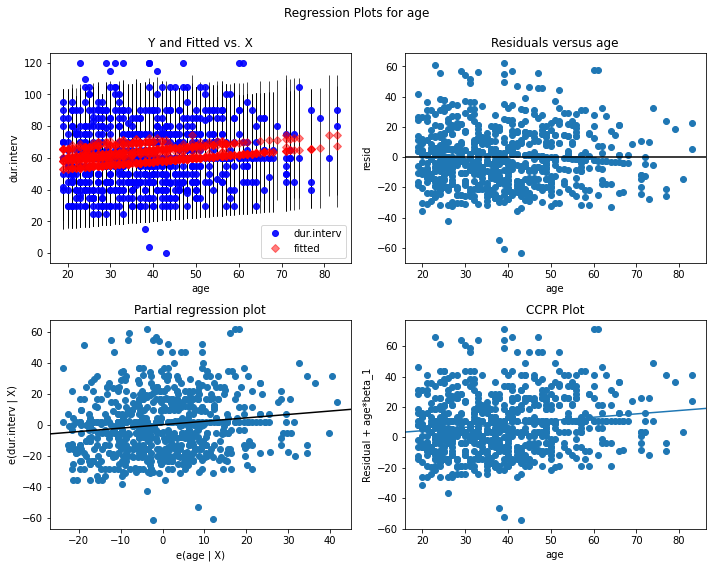

In [101]:
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(est, "age", fig=fig)

### Statistical significance

Multiple regression computes a P value for each parameter in the model testing the null hypothesis that the true value of that parameter is zero. Why zero? When a regression coefficient equals zero, then the corresponding independent variable has **no effect in the model**. The CI of $\beta_4$ _scz.cons_ runs from a negative to a positive number, including the value defining H0, then the P value must be greater thant 0.05.

### R²

$R^2$ equals 0.058, this means that only 5.8% of the variability in Y is explained by the model. With multiple regression models which have more than two independent variables, we cannot visualize the best-fit line superimposed on the data. A way to visualize how well a multiple regression model fit the data is presented below. For each point/participant, the prediction is computed from the other variables for that participant and the best-fit parameter values.

In [102]:
data_['pred'] = est.predict(X)

C:\Users\SBASTI~1\AppData\Local\Temp/ipykernel_11292/2905688318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_['pred'] = est.predict(X)


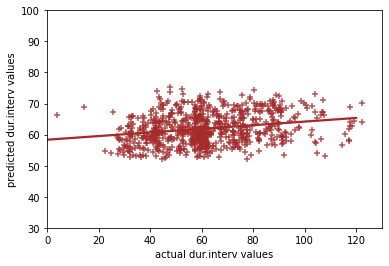

In [103]:
import seaborn as sns
sns.regplot(
    x='dur.interv',
    y='pred',
    data=data_,
    ci=None,
    marker='+',
    x_jitter=3,
    y_jitter=2,
    color='brown',
)
plt.xlabel('actual dur.interv values')
plt.xlim((0,130))
plt.ylabel('predicted dur.interv values')
plt.ylim((30,100));

In [104]:
import pingouin as pg

lm = pg.linear_regression(X=data_['dur.interv'], y=data_['pred'])
lm.round(3)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,58.362,0.558,104.559,0.0,0.058,0.057,57.266,59.458
1,dur.interv,0.058,0.009,6.793,0.0,0.058,0.057,0.041,0.075


The graph shows how well the model predicts the actual _dur.interv_. If the prediction were perfect, all the points would align on a 45-degree line with the predicted _dur.interv_ matching the actual values. The predictions for the example data are far from perfect. The predicted and actual values are correlated with R² equal to 0.058. By definition, this is identical to the overall R² computed by multiple regression.

### Adjusted R²

Even if the independent variables are completely unable to predict the dependent variable, R² will be greater than zero, limiting the usefulness of R² as a way to quantify goodness of fit, especially with small sample sizes. Adjusted R² estimates how well the model is expected to fit new data. This measure accounts for the number od independent variables and is always smaller than R²:
$$ R^2_{\text{adj}} = 1 - \frac{(1-R^2)(n-1)}{n-k-1} $$

This study has far more participants (747) than independent variables (4) so the adjusted R² is only a tiny bit smaller than the unadjusted R².

In [105]:
n = est.nobs
k = len(est.params) - 1 # minus 'const'
Rsq_adj = 1 - ((1 - est.rsquared) * (n - 1)) / (n - k - 1)
print(f"R² adjusted (n={n} and k={k}) = {Rsq_adj:4.3f}")

R² adjusted (n=747.0 and k=4) = 0.053


Rules of thumb specify that the number of participants (n) should be somewhere between 10-40 times the number of variables (k). With ca. 800 participants, we may analyze 20 independent variables.

### Variable selection

The authors of the example presented in the chapter 37 of Intuitive Biostatistics 4th stated that the collected data for more variables for each participant and that the fit of the model was not improved when the model also account for smoking, mean blood pressure, residence in urban vs. rural etc. Consequently, the omitted these variables from the model whose fit they reported. In other words they computed a P value for each independent variable in the model, removed variables for which P values were greater than 0.05 and then reran the model wothout those variables (backward-stepwise selection of step-down).

Deciding how to construct models is a difficult problem...

In [106]:
data.columns

Index(['age', 'prof', 'duree', 'discip', 'n.enfant', 'n.fratrie', 'ecole',
       'separation', 'juge.enfant', 'place', 'abus', 'grav.cons', 'dep.cons',
       'ago.cons', 'ptsd.cons', 'alc.cons', 'subst.cons', 'scz.cons', 'char',
       'rs', 'ed', 'dr', 'suicide.s', 'suicide.hr', 'suicide.past',
       'dur.interv'],
      dtype='object')

In [107]:
# let's try to fit the data with more variables
var2 = [
       'age',
       'n.enfant',
       'grav.cons',
       'dep.cons',
       'ago.cons',
       'alc.cons',
       'subst.cons',
       'scz.cons'
]
data2_ = data.dropna(subset=['dur.interv'] + var2)

y2 = data2_['dur.interv']
X2 = data2_[var2]

X2 = sm.add_constant(X2)
mod2 = sm.OLS(y2, X2)
est2 = mod2.fit()
print(est2.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.071    
Dependent Variable: dur.interv       AIC:                6310.4284
Date:               2021-08-05 16:35 BIC:                6351.6667
No. Observations:   722              Log-Likelihood:     -3146.2  
Df Model:           8                F-statistic:        7.891    
Df Residuals:       713              Prob (F-statistic): 3.33e-10 
R-squared:          0.081            Scale:              361.38   
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
const          44.2043    3.1398  14.0788  0.0000  38.0400  50.3687
age             0.1943    0.0636   3.0545  0.0023   0.0694   0.3192
n.enfant        0.8929    0.4232   2.1100  0.0352   0.0621   1.7236
grav.cons       1.3273    0.5282   2.5126  0.0122   0.2902   2.3644
dep.co

C:\Users\Sébastien\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Interactions among independent variables

What if the effects of one variable matter more with another variable? To include interaction between 2 variables, add a new term in the model equation with a new parameter multiplyied by the product of e.g. dep.cons ($X_2$) times subst.cons ($X_3$): $ Y_i = \beta_0 + \beta_1 X_{i, age} + \beta_2 X_{i, dep.cons} + \beta_3 X_{i, subst.cons} + \beta_4 X_{i, scz.cons} + \beta_{2,3} \pmb{X_{i, dep.cons} X_{i, subst.cons}} + \epsilon_i $

In [108]:
# let's try to fit the data with more variables
var3 = ['age', 'dep.cons', 'subst.cons', 'scz.cons']
data3_ = data.dropna(subset=['dur.interv'] + var3)
data3_['interaction'] = data['dep.cons'] * data['subst.cons'] # math multiplication

y3 = data3_['dur.interv']
X3 = data3_[var3 + ['interaction']]

X3 = sm.add_constant(X3)
mod3 = sm.OLS(y3, X3)
est3 = mod3.fit()
print(est3.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.054    
Dependent Variable: dur.interv       AIC:                6531.3868
Date:               2021-08-05 16:35 BIC:                6559.0831
No. Observations:   747              Log-Likelihood:     -3259.7  
Df Model:           5                F-statistic:        9.588    
Df Residuals:       741              Prob (F-statistic): 7.02e-09 
R-squared:          0.061            Scale:              364.17   
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
const          49.5169    2.6579  18.6303  0.0000  44.2991  54.7348
age             0.2173    0.0571   3.8045  0.0002   0.1052   0.3294
dep.cons        6.1578    1.6977   3.6270  0.0003   2.8248   9.4908
subst.cons      3.1724    2.2985   1.3802  0.1679  -1.3399   7.6848
scz.co

C:\Users\SBASTI~1\AppData\Local\Temp/ipykernel_11292/3058201021.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3_['interaction'] = data['dep.cons'] * data['subst.cons'] # math multiplication
C:\Users\Sébastien\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


The CI of the interaction includes zero, then you will conclude that there is no significant interaction between _dep.cons_ and _subst.cons_. Equivalently, the effect of _dep.cons_ does not depend on _subst.cons_.

ATTENTION, the effects of the single variables of the interaction cannont be interpreted!

### patsy formula (R-style)

In [109]:
import statsmodels.formula.api as smf
# statsmodels allows users to fit statistical models using R-style formulas.
# Internally, statsmodels uses the patsy package to convert formulas and data
# to the matrices that are used in model fitting.

model4 = smf.ols(
    formula = "Q('dur.interv') ~ age + Q('scz.cons') + Q('dep.cons'):Q('subst.cons')",
    data=data3_
)
# Q() is a way to 'quote' variable names, especially ones that do not otherwise 
# meet Python's variable name rules, such as with a dot in the variable name

# ":" adds a new column to the design matrix with the product of the other two columns.
# "*" will also include the individual columns that were multiplied together:

results4 = model4.fit()
print(results4.summary2())

                       Results: Ordinary least squares
Model:                   OLS                 Adj. R-squared:        0.040    
Dependent Variable:      Q('dur.interv')     AIC:                   6540.6674
Date:                    2021-08-05 16:35    BIC:                   6559.1317
No. Observations:        747                 Log-Likelihood:        -3266.3  
Df Model:                3                   F-statistic:           11.38    
Df Residuals:            743                 Prob (F-statistic):    2.66e-07 
R-squared:               0.044               Scale:                 369.70   
-----------------------------------------------------------------------------
                               Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-----------------------------------------------------------------------------
Intercept                     52.6832   2.3309 22.6022 0.0000 48.1073 57.2591
age                            0.1966   0.0545  3.6083 0.0003  0.0896  0.3036
Q('scz.co

In [110]:
model5 = smf.ols(
    formula="Q('dur.interv') ~ age + Q('scz.cons') + Q('dep.cons')*Q('subst.cons')", 
    data=data3_
)

results5 = model5.fit()
print(results5.summary2())
# same results as with model3 written using R-style

                       Results: Ordinary least squares
Model:                   OLS                 Adj. R-squared:        0.054    
Dependent Variable:      Q('dur.interv')     AIC:                   6531.3868
Date:                    2021-08-05 16:35    BIC:                   6559.0831
No. Observations:        747                 Log-Likelihood:        -3259.7  
Df Model:                5                   F-statistic:           9.588    
Df Residuals:            741                 Prob (F-statistic):    7.02e-09 
R-squared:               0.061               Scale:                 364.17   
-----------------------------------------------------------------------------
                               Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-----------------------------------------------------------------------------
Intercept                     49.5169   2.6579 18.6303 0.0000 44.2991 54.7348
age                            0.2173   0.0571  3.8045 0.0002  0.1052  0.3294
Q('scz.co

### Removal of the intercept parameter

In [111]:
# intercept automatically added using patsy formula, can be removed using -1
model6 = smf.ols(
    formula="Q('dur.interv') ~ age + Q('scz.cons') + Q('dep.cons'):Q('subst.cons') - 1", 
    data=data3_)
results = model.fit()
print(results.summary2())

                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.853    
Dependent Variable:     Q('dur.interv')  AIC:                         6929.5606
Date:                   2021-08-05 16:35 BIC:                         6943.4087
No. Observations:       747              Log-Likelihood:              -3461.8  
Df Model:               3                F-statistic:                 1441.    
Df Residuals:           744              Prob (F-statistic):          2.40e-309
R-squared (uncentered): 0.853            Scale:                       623.06   
-------------------------------------------------------------------------------
                                 Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-------------------------------------------------------------------------------
age                              1.3579   0.0235 57.7363 0.0000  1.3118  1.4041
Q('scz.cons')                    6.6538   3.2980  2.0175 0.0440 

#### Special variables

We already saw that it is possible to create a new variable by transforming a variable to its logarithm, converting a mutliplicative effect to an additive one, knowing that regression models are intrinsically additive.

We can therefore also use formulas such as

```python
#formula = "Q('dur.interv') ~ age + log(rs) + Q('dep.cons'):Q('subst.cons')",
```

#### Categorical variable with at least 2 classes

In [112]:
# let's introduce the categorical variable 'prof'
data['prof'].unique()

array(['autre', nan, 'prof.intermediaire', 'ouvrier', 'sans emploi',
       'artisan', 'employe', 'agriculteur', 'cadre'], dtype=object)

In [113]:
# preparation of the subset, i.e. selection of the variables and dropna
var7 = ['age', 'dep.cons', 'subst.cons', 'scz.cons', 'prof']
df = data.dropna(subset=['dur.interv'] + var7)

# getting dummies
dummies = pd.get_dummies(df['prof'], drop_first=True)
data7_ = pd.concat([df, dummies], axis=1)

In [114]:
data7_.columns

Index(['age', 'prof', 'duree', 'discip', 'n.enfant', 'n.fratrie', 'ecole',
       'separation', 'juge.enfant', 'place', 'abus', 'grav.cons', 'dep.cons',
       'ago.cons', 'ptsd.cons', 'alc.cons', 'subst.cons', 'scz.cons', 'char',
       'rs', 'ed', 'dr', 'suicide.s', 'suicide.hr', 'suicide.past',
       'dur.interv', 'artisan', 'autre', 'cadre', 'employe', 'ouvrier',
       'prof.intermediaire', 'sans emploi'],
      dtype='object')

In [115]:
var8 = [
        'age',
        'dep.cons',
        'subst.cons',
        'scz.cons',
        'artisan',
        'autre',
        'cadre',
        'employe',
        'ouvrier',
        'prof.intermediaire',
        'sans emploi'
]

y8 = data7_['dur.interv']
X8 = data7_[var8]

X8 = sm.add_constant(X8)
mod8 = sm.OLS(y8, X8)
est8 = mod8.fit()
print(est8.summary2())

                  Results: Ordinary least squares
Model:                OLS              Adj. R-squared:     0.052    
Dependent Variable:   dur.interv       AIC:                6504.1550
Date:                 2021-08-05 16:35 BIC:                6559.4834
No. Observations:     743              Log-Likelihood:     -3240.1  
Df Model:             11               F-statistic:        4.692    
Df Residuals:         731              Prob (F-statistic): 5.82e-07 
R-squared:            0.066            Scale:              365.04   
--------------------------------------------------------------------
                    Coef.   Std.Err.    t    P>|t|   [0.025   0.975]
--------------------------------------------------------------------
const               62.7920  10.2078  6.1514 0.0000  42.7519 82.8321
age                  0.2129   0.0588  3.6180 0.0003   0.0974  0.3284
dep.cons             7.3679   1.4584  5.0521 0.0000   4.5048 10.2311
subst.cons           5.3459   1.7690  3.0220 0.0026  

C:\Users\Sébastien\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


##### using patsy

In [116]:
var9 = ['age', 'dep.cons', 'subst.cons', 'scz.cons', 'prof']
data9_ = data.dropna(subset=['dur.interv'] + var9)

y9 = data9_['dur.interv']
X9 = data9_[var9]

model9 = smf.ols(
    formula="Q('dur.interv') ~ age + Q('dep.cons') + Q('subst.cons') + Q('scz.cons') + prof",
    data=data9_)

# patsy determined that elements of 'prof' were text strings, so it treated Prof as
# a categorical variable. patsy's default is also to include an intercept, so we automatically
# dropped one of the Prof categories

est9 = model9.fit()
print(est9.summary2())

                      Results: Ordinary least squares
Model:                  OLS                 Adj. R-squared:        0.052    
Dependent Variable:     Q('dur.interv')     AIC:                   6504.1550
Date:                   2021-08-05 16:35    BIC:                   6559.4834
No. Observations:       743                 Log-Likelihood:        -3240.1  
Df Model:               11                  F-statistic:           4.692    
Df Residuals:           731                 Prob (F-statistic):    5.82e-07 
R-squared:              0.066               Scale:                 365.04   
----------------------------------------------------------------------------
                            Coef.   Std.Err.    t    P>|t|   [0.025   0.975]
----------------------------------------------------------------------------
Intercept                   62.7920  10.2078  6.1514 0.0000  42.7519 82.8321
prof[T.artisan]            -11.4851   9.8294 -1.1685 0.2430 -30.7823  7.8120
prof[T.autre]         

#### Relevel

Using pd.get_dummies it is possible to not drop_first and then drop the new reference, here 'ouvrier'.

In [117]:
model10 = smf.ols(
    formula="Q('dur.interv') ~ age + Q('dep.cons') + Q('subst.cons') + Q('scz.cons') + C(prof, Treatment(reference='ouvrier'))",
    data=data9_)

# If Prof had been an integer variable that we wanted to treat explicitly as categorical, we 
# could have done so by using the C() operator, which by the way utilizes the Treatment relevel()

est10 = model10.fit()
print(est10.summary2())

                                       Results: Ordinary least squares
Model:                              OLS                            Adj. R-squared:                   0.052    
Dependent Variable:                 Q('dur.interv')                AIC:                              6504.1550
Date:                               2021-08-05 16:35               BIC:                              6559.4834
No. Observations:                   743                            Log-Likelihood:                   -3240.1  
Df Model:                           11                             F-statistic:                      4.692    
Df Residuals:                       731                            Prob (F-statistic):               5.82e-07 
R-squared:                          0.066                          Scale:                            365.04   
--------------------------------------------------------------------------------------------------------------
                                         